# Numerical inversion of ratio: Broda-Kan Approach

## Python+Numba (Algorithms)

**Section 3.2:** Inversion formula for ratio $T$ of independent RVs $X_1,X_2$
$$
f_T(x) = \frac{1}{\pi^2} \int_0^{+\infty} \int_{-\infty}^{+\infty} \Re\left\{\frac{\varphi_{X_1}(t_1)}{t_2} \varphi_{X_2}^{\prime}(-t_2 - x t_1)\right\} d t_1 d t_2.
$$

**Ref.** Hanč J., Hančová M., Borovský D., Probability distributions and calculations for Hake’s ratio statistics in measuring effect size, 
*preprint submitted to Statistical Papers*

# Hake ratio as an example

For ratio of independent normal variables:  $T = X_1/X_2$

- Numerator $ X_1 \sim N(a, 1) $:
- Denominator $ X_2 \sim N(b, 1) $:

## INTEGRAND for integration

### CF of $X_1$
$\varphi_{X_1}(t_1)$

**Hake ratio** - For ratio of indepedent normal variables in $T = X_1/X_2$

Numerator $ X_1 \sim N(a, 1), a = 1.5 $:
- CF: $ \varphi_{X_1}(t) = e^{i a t - \frac{t^2}{2}}$

Bivariate ratio CF of $X_1$
- CF$_d$: $ \dfrac{\varphi_{X_1}(t_1)}{t_2}$ 

In [1]:
# characteristic function of X1 ~ N(a,1)
a = 1.5
cf1 = lambda t1: np.exp(1j * a * t1 - t1**2 / 2)

In [2]:
# bivariate cf1 divided by t2
cf1_d = lambda t: cf1(t[:,0]) / t[:,1]

In [3]:
# numba versions of cf1 and cf1_d
from numba import njit, jit, vectorize, float64, prange

@njit(fastmath=True)
def cf1n(t1, a=1.5):
    return np.exp(1j * a * t1 - t1**2 / 2)

# Numba version of cf1_d
@njit(fastmath=True)
def cf1n_d(t, a=1.5):
    return np.exp(1j * a * t[:, 0] - t[:, 0]**2 / 2) / t[:, 1]

### Derivative of CF of $X_2$
$ \varphi_{X_2}'(t_2)$

**Hake ratio** - For ratio of indepedent normal variables in $T = X_1/X_2$

Denominator $ X_2 \sim N(b, 1) $, $ b = 1 $\:
- CF: $ \varphi_{X_2}(t) = e^{i b t - \frac{t^2}{2}}$
- CF derivative: $\varphi_{X_2}'(t) = \left( i b - t \right) e^{i  bt - \frac{t^2}{2}}$

In [4]:
# derivative of characteristic function of X2
b = 1
cf2 = lambda t2: np.exp(1j * b * t2 - t2**2 / 2)
cf2_dif = lambda t2: (1j * b - t2) * np.exp(1j * b * t2 - t2**2 / 2)

In [5]:
# Numba versions of cf2 and cf2_dif functions
@njit(fastmath=True)
def cf2n(t2, b=1):
    return np.exp(1j * b * t2 - t2**2 / 2)

@njit(fastmath=True)
def cf2n_dif(t2, b=1):
    return (1j * b - t2) * np.exp(1j * b * t2 - t2**2 / 2)

In [6]:
# Numerical derivative of X2 using finite differences
h = 1e-5
cf2_dif_num = lambda x: (cf2(x + h) - cf2(x - h)) / (2*h)
cf2_dif_num2 = lambda x: (4/3 * (cf2(x + h) - cf2(x - h)) / (2*h)) - (1/3 * (cf2(x + 2*h) - cf2(x - 2*h)) / (4*h))

In [7]:
# Numba version of the numerical derivative functions using finite differences
@njit(fastmath=True)
def cf2n_dif_num(x, h=1e-5, b=1):
    return (cf2n(x + h, b) - cf2n(x - h, b)) / (2 * h)

@njit(fastmath=True)
def cf2n_dif_num2(x, h=1e-5, b=1):
    return (4/3 * (cf2n(x + h, b) - cf2n(x - h, b)) / (2 * h)) - (1/3 * (cf2n(x + 2*h, b) - cf2n(x - 2*h, b)) / (4 * h))

**Note: Accurate numerical derivative**  
*Midpoint approximation*
$$
q^{\prime}(x) = \frac{q(x+h) - q(x-h)}{2h} + O(h^2).
$$
*Richardson extrapolation*
$$
q^{\prime}(x) = \frac{4}{3} \frac{q(x+h) - q(x-h)}{2 h} - \frac{1}{3} \frac{q(x+2 h) - q(x-2 h)}{4 h} + O\left(h^4\right).
$$

# 2D Integration

**Section 3.2:** Inversion formula for ratio $T$ of independent RVs $X_1,X_2$
$$
f_T(x) \equiv f(x_1, x_2 = 1) = \frac{1}{\pi^2} \int_{-\infty}^{+\infty} \int_0^{+\infty} \Re\left\{\varphi_{X_2}^{\prime}(- x_1 t_1 - x_2 t_2)\,\frac{\varphi_{X_1}(t_1)}{t_2} \right\} d t_2 d t_1.
$$

Numerical quadrature (according to Mijanović et al 2023)
$$
f\left(x_1, x_2\right)\approx\frac{1}{\pi^2} h_1 h_2 \sum_{v_2=-N}^{N} \sum_{v_1=0}^{N}  \Re\left\{ \varphi_{X_2}^{\prime}(- x_1 b_1 - x_2 b_2) \frac{\varphi_{X_1}(b_1)}{b_2}\right\}$$

$$b_1=h_1\left(v_1+0.5\right), b_2=h_2\left(v_2+0.5\right)$$

**Refs.**
- Mijanović, Andjela, Božidar V. Popović, and Viktor Witkovský. 2023. “A Numerical Inversion of the Bivariate Characteristic Function.” Applied Mathematics and Computation 443:127807. https://doi.org/10.1016/j.amc.2022.127807.

- Original Matlab code for bivariate cfs  
https://github.com/witkovsky/CharFunTool/blob/master/CF_InvAlgorithms/cf2Dist2D.m



## INPUT PARAMETERS for integration

In [8]:
# Numpy auxiliary functions

# Lambda function to create an array of integers from v1 to v2 inclusive
s = lambda v1, v2: np.arange(v1, v2 + 1)

# Import specific numpy functionalities
from numpy import array as v, pi as pi

In [9]:
# parameters for boundaries
SixSigmaRule = 6
tolDiff = 1e-6
# accuracy for cf functions
cftTol = 1e-14
# tunnig constant for more exact results
k = 3

## BOUNDARIES for integral

The mean and standard deviation of the random vector $X=\left(X_1, X_2\right)$ from the given marginal CFs using the higher-order methods for approximating the derivatives. In particular, we use the following estimates as Mijanović et al, 2023:

$$
\begin{aligned}
& \operatorname{mean}\left(X_1\right)=\left(\frac{8 \Im(\mathrm{cf} 1(\delta))}{5 \delta}-\frac{2 \Im(\mathrm{cf} 1(2 \delta))}{5 \delta}+\frac{8 \Im(\mathrm{cf} 1(3 \delta))}{105 \delta}-\frac{2 \Im(\mathrm{cf} 1(4 \delta))}{280 \delta}\right), \\
& \operatorname{mo}_2\left(X_1\right)=\left(\frac{205}{72 \delta^2}-\frac{16 \Re(\mathrm{cf} 1(\delta))}{5 \delta^2}+\frac{2 \Re(\mathrm{cf} 1(2 \delta))}{5 \delta^2}-\frac{16 \Re(\mathrm{cf} 1(3 \delta))}{315 \delta^2}+\frac{2 \Re(\mathrm{cf} 1(4 \delta))}{560 \delta^2}\right), \\
& \operatorname{std}\left(X_1\right)=\sqrt{\operatorname{mo}_2\left(X_1\right)-\text { mean }^2\left(X_1\right)}
\end{aligned}
$$

where $\delta$ is chosen tolerance for numerical differentiation (as a default value we use $\delta=10^{-4}$ ) and $\mathrm{mo}_2$ denotes the estimate of the second moment. Similarly, calculate mean $\left(X_2\right)$ and $\operatorname{std}\left(X_1\right)$ so that then mean $(X)=$ $\left[\operatorname{mean}\left(X_1\right)\right.$, mean $\left.\left(X_2\right)\right]$ and $\operatorname{std}(X)=\left[\operatorname{std}\left(X_1\right), \operatorname{std}\left(X_2\right)\right]$.

In [10]:
# auxiliary functions for estimates of moments
cft1 = cf1(tolDiff*s(1,4))
cftRe1 = np.real(cft1)
cftIm1 = np.imag(cft1)
cft2 = cf2(tolDiff*s(1,4))
cftRe2 = np.real(cft2)
cftIm2 = np.imag(cft2)

In [11]:
# first moments 
xMean = np.zeros(2)
xMean[0] = (8*cftIm1[0]/5 - 2*cftIm1[1]/5 + 8*cftIm1[2]/105 - 2*cftIm1[3]/280) / tolDiff
xMean[1] = (8*cftIm2[0]/5 - 2*cftIm2[1]/5 + 8*cftIm2[2]/105 - 2*cftIm2[3]/280) / tolDiff

xM2 = np.zeros(2)
xM2[0] = (205/72 - 16*cftRe1[0]/5 + 2*cftRe1[1]/5 - 16*cftRe1[2]/315 + 2*cftRe1[3]/560) / tolDiff**2
xStd = np.zeros(2)
xStd[0] = np.sqrt(xM2[0] - xMean[0]**2)
xM2[1] = (205/72 - 16*cftRe2[0]/5 + 2*cftRe2[1]/5 - 16*cftRe2[2]/315 + 2*cftRe2[3]/560) / tolDiff**2
xStd[1] = np.sqrt(xM2[1] - xMean[1]**2)

In [12]:
# boundaries and range
xMin = xMean - SixSigmaRule * xStd
xMax = xMean + SixSigmaRule * xStd
Range = xMax - xMin

xMin, xMax, Range

(array([-4.50058963, -5.00131779]),
 array([7.50058963, 7.00131779]),
 array([12.00117926, 12.00263557]))

# Calculating the quadrature sum

$$
f\left(x_1, x_2=1\right)\approx\frac{1}{\pi^2} h_1 h_2 \sum_{v_2=-N}^{N} \sum_{v_1=0}^{N}  \Re\left\{ \varphi_{X_2}^{\prime}(- x_1 b_1 - x_2 b_2) \frac{\varphi_{X_1}(b_1)}{b_2}\right\}$$

$$b_1=h_1\left(v_1+0.5\right), b_2=h_2\left(v_2+0.5\right)$$

In [13]:
# set of values x for pdf
xN = 1000
x1 = np.linspace(xMin[0], xMax[0], xN)
x2 = np.ones(xN)
x = np.column_stack((x1, x2))

In [14]:
# parameters for sum
N = 2**8  # Set large N to improve the precision, e.g. N = 2^10
dt = 2 * pi / (k*Range)
t1 = (0.5 + s(-N, N)) * dt[0]
t2 = (0.5 + s(0, N)) * dt[1]
c = dt[0] * dt[1] / pi**2

In [15]:
# Initialize the dictionary to store performance data for methods
rt = dict()
from time import time

# Algorithm 1 - via loops

In [16]:
Run=False

In [17]:
if Run:
    tic = time()
    # Initialize an array to hold the PDF values
    pdf = []  # Preallocate PDF list
    
    # Loop through each value of x = x1
    for xi in x1:
        S = 0  # Initialize summation variable
        # Loop through each value of b1 = t1
        for T1 in t1:
            # Loop through each value of b2 = t2
            for T2 in t2:
                cval = cf1(T1) / T2
                if abs(cval)>cftTol:
                    # calculate sum
                    S += cval * cf2_dif(-T2-xi*T1)
        # PDF value for current xi
        pdf += [c * S.real]
    
    # Ensure ratio PDF values are non-negative
    Rpdf_1 = np.maximum(0, pdf)
    toc = time()-tic

In [18]:
rt['loops no vect'] = 155 # toc

## Numba paralellization

In [19]:
# Numba fast version
@njit(fastmath=True)
def numba_pdf_fast_no_numpy(x1, t1, t2, c):
    pdf = np.empty(len(x1), dtype=np.float64)
    for i in range(len(x1)):
        xi = x1[i]
        S = 0.0
        for T1 in t1:
            for T2 in t2:
                cval = cf1n(T1) / T2
                if abs(cval)>cftTol:
                    S += cval* cf2n_dif(-T2 - xi * T1)
        pdf[i] = c * S.real
    return pdf

In [20]:
# measuring runtime
rt['fastmath loops no vect'] = runtime('''
pdfn = numba_pdf_fast_no_numpy(x1, t1, t2, c)
Rpdfn_1n = np.maximum(0, pdfn)
''',
r=10,n=1).average

1.33 s ± 367 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [21]:
# Numba parallelized version
@njit(parallel=True, fastmath=True)
def numba_pdf_parallel_no_numpy(x1, t1, t2, c):
    pdf = np.empty(len(x1), dtype=np.float64)
    for i in prange(len(x1)):
        xi = x1[i]
        S = 0.0
        for T1 in t1:
            for T2 in t2:
                cval = cf1n(T1) / T2
                if abs(cval)>cftTol:
                    S += cval* cf2n_dif(-T2 - xi * T1)
        pdf[i] = c * S.real
    return pdf

pdfn = numba_pdf_parallel_no_numpy(x1, t1, t2, c)
Rpdfn_1n = np.maximum(0, pdfn)

In [22]:
rt['par loops no vect']= runtime('''
pdfn = numba_pdf_parallel_no_numpy(x1, t1, t2, c)
Rpdfn_1n = np.maximum(0, pdfn)
''',
r=10,n=2).average

120 ms ± 4.28 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)


In [23]:
# Numba parallelized version
@njit(parallel=True, fastmath=True)
def numba_pdf_parallel_numDer_no_numpy(x1, t1, t2, c):
    pdf = np.empty(len(x1), dtype=np.float64)
    for i in prange(len(x1)):
        xi = x1[i]
        S = 0.0
        for T1 in t1:
            for T2 in t2:
                cval = cf1n(T1) / T2
                if abs(cval)>cftTol:
                    S += cval* cf2n_dif_num2(-T2 - xi * T1)
        pdf[i] = c * S.real
    return pdf

pdfnn = numba_pdf_parallel_numDer_no_numpy(x1, t1, t2, c)
Rpdfn_1nn = np.maximum(0, pdfnn)

In [24]:
rt['par loops numDerExact no vect']= runtime('''
pdfnn = numba_pdf_parallel_numDer_no_numpy(x1, t1, t2, c)
Rpdfn_1nn = np.maximum(0, pdfnn)
''',
r=10,n=2).average

271 ms ± 24.4 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)


In [25]:
# acceleration
drt = DF(rt,colname='runtime(s)')
drt['rtPerPoint'] = drt['runtime(s)']/xN
drt['accel'] = np.round(drt.iloc[0,0]/drt['runtime(s)'])
drt

,runtime(s),rtPerPoint,accel
loops no vect,155.000000,0.155000,1.0
fastmath loops no vect,1.234664,0.001235,126.0
par loops no vect,0.120145,0.000120,1290.0
par loops numDerExact no vect,0.270594,0.000271,573.0


# Algorithm 2 - vectorization for sum

In [26]:
from time import time
if Run:
    tic = time()
    # Vectorizes the nested loops over T1 and T2 using numpy operations for efficiency
    
    # Initialize an array to hold the PDF values
    S = np.empty(len(x1), dtype=np.complex128)
    T1, T2 = np.meshgrid(t1, t2, indexing='ij')
    
    # Loop through each value of x = x1
    for i in range(len(x1)):
        xi = x1[i]
        S[i] = np.sum(cf1(T1) / T2 * cf2_dif(-T2 - xi * T1))
        
    # Ensure ratio PDF values are non-negative
    pdf = c * S.real
    Rpdf_2 = np.maximum(0, pdf)
    toc = time()-tic

In [27]:
rt['vect intSum'] = 16.43 # toc

## Numba parallelization

In [28]:
import psutil
Nc = psutil.cpu_count(logical=False)
print(f"Number of logical CPUs: {Nc}")

Number of logical CPUs: 12


In [29]:
# The code applies Numba to parallelize the computation of PDF values over x1 more efficiently
T1, T2 = np.meshgrid(t1, t2, indexing='ij')

def numba_pdf(cf1,cf2_dif):
    # wrapper for cf1, cf2_dif
    @njit(parallel=True, fastmath=True)
    def pdf(x1,T1,T2):
        S = np.empty(len(x1), dtype=np.complex128)
        for i in prange(len(x1)):
            xi = x1[i]
            S[i] = np.sum(cf1(T1) / T2 * cf2_dif(-T2 - xi * T1))
        return c*S.real
    return pdf

pdfn = numba_pdf(cf1n, cf2n_dif)
# Ensure ratio PDF values are non-negative
Rpdfn_2n = np.maximum(0, pdfn(x1,T1,T2))

In [30]:
rt['par vect intSum'] = runtime('''
Rpdfn_2n = np.maximum(0, pdfn(x1,T1,T2))
''', r=10,n=2).average

721 ms ± 40.9 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)


In [31]:
# acceleration
drt = DF(rt,colname='runtime(s)')
drt['rtPerPoint'] = drt['runtime(s)']/xN
drt['accel'] = np.round(drt.iloc[0,0]/drt['runtime(s)'])
drt

,runtime(s),rtPerPoint,accel
loops no vect,155.000000,0.155000,1.0
fastmath loops no vect,1.234664,0.001235,126.0
par loops no vect,0.120145,0.000120,1290.0
par loops numDerExact no vect,0.270594,0.000271,573.0
vect intSum,16.430000,0.016430,9.0
par vect intSum,0.720793,0.000721,215.0


# Algorithm 3 - complete vectorization for $f(x)$

## A - Vectorized version for f(x)

In [32]:
# A vectorized version for f(x)
tic = time()
# Create meshgrid for t1 and t2
T1, T2 = np.meshgrid(t1, t2)   
t = np.column_stack((T1.ravel(), T2.ravel()))  # vector of all pairs t1,t2

# Integrand terms
CF2_dif = cf2_dif(-x @ t.T)
CF1_d = cf1_d(t)

# Ratio pdf 
pdf = c * np.real(CF2_dif @ CF1_d)
Rpdf_3A = np.maximum(0, pdf)
toc = time()-tic

In [33]:
rt['vect pdf'] = toc 

### An - Numba vectorized version for f(x)

In [34]:
# B - Optimized vectorized version for f(x)
tic = time()
# Create meshgrid for t1 and t2
T1, T2 = np.meshgrid(t1, t2)   
t = np.column_stack((T1.ravel(), T2.ravel()))  # vector of all pairs t1,t2

# Integrand terms
CF2_dif = cf2n_dif(-x @ t.T)
CF1_d = cf1n_d(t)

# Ratio pdf 
pdf = c * np.real(CF2_dif @ CF1_d)
Rpdf_3An = np.maximum(0, pdf)
toc = time()-tic

In [35]:
rt['fastmath vect pdf'] = toc 

## B - Optimized vectorized version for f(x)


In [36]:
# B- Optimized vectorized version for f(x)
tic = time()
# Create meshgrid for t1 and t2
T1, T2 = np.meshgrid(t1, t2)   
t = np.column_stack((T1.ravel(), T2.ravel()))  # vector of all pairs t1,t2

# Integrand term 1
CF1_d = cf1_d(t)
# optimization
id = np.abs(CF1_d) > cftTol
CF1_d = CF1_d[id]
t = t[id, :]
# Integrand term 2
CF2_dif = cf2_dif(-x @ t.T)

# Ratio pdf 
pdf = c * np.real(CF2_dif @ CF1_d)
Rpdf_3B = np.maximum(0, pdf)
toc = time()-tic

In [37]:
rt['opt vect pdf'] = toc 

### Bn - Numba Optimized vectorized version for f(x)

In [38]:
# B- Numba Optimized vectorized version for f(x)
tic = time()
# Create meshgrid for t1 and t2
T1, T2 = np.meshgrid(t1, t2)   
t = np.column_stack((T1.ravel(), T2.ravel()))  # vector of all pairs t1,t2

# Integrand term 1
CF1_d = cf1n_d(t)
# optimization
id = np.abs(CF1_d) > cftTol
CF1_d = CF1_d[id]
t = t[id, :]
# Integrand term 2
CF2_dif = cf2n_dif(-x @ t.T)

# Ratio pdf 
pdf = c * np.real(CF2_dif @ CF1_d)
Rpdf_3Bn = np.maximum(0, pdf)
toc = time()-tic

In [39]:
rt['fastmath opt vect pdf'] = toc

## C - Optimized vectorized version for f(x) using numeric derivative


In [40]:
#  C - Optimized vectorized version for f(x) using numeric derivative
tic = time()
# Create meshgrid for t1 and t2
T1, T2 = np.meshgrid(t1, t2)   
t = np.column_stack((T1.ravel(), T2.ravel()))  # vector of all pairs t1,t2

# Integrand term 1
CF1_d = cf1_d(t)
# optimization
id = np.abs(CF1_d) > cftTol
CF1_d = CF1_d[id]
t = t[id, :]
# Integrand term 2
CF2_dif = cf2_dif_num(-x @ t.T)

# Ratio pdf 
pdf = c * np.real(CF2_dif @ CF1_d)
Rpdf_3C = np.maximum(0, pdf)
toc = time()-tic

In [41]:
rt['opt vect pdf numDer'] = toc

### Cn - Numba Optimized vectorized version for f(x) using numeric derivative

In [42]:
#  C - Numba optimized vectorized version for f(x) using numeric derivative
tic = time()
# Create meshgrid for t1 and t2
T1, T2 = np.meshgrid(t1, t2)   
t = np.column_stack((T1.ravel(), T2.ravel()))  # vector of all pairs t1,t2

# Integrand term 1
CF1_d = cf1n_d(t)
# optimization
id = np.abs(CF1_d) > cftTol
CF1_d = CF1_d[id]
t = t[id, :]
# Integrand term 2
CF2_dif = cf2n_dif_num(-x @ t.T)

# Ratio pdf 
pdf = c * np.real(CF2_dif @ CF1_d)
Rpdf_3Cn = np.maximum(0, pdf)
toc = time()-tic

In [43]:
rt['fastmath opt vect pdf numDer'] = toc

## D - Optimized vectorized version for f(x) using more exact numeric derivative


In [44]:
# D - Optimized vectorized version for f(x) using exact numeric derivative
tic = time()
# Create meshgrid for t1 and t2
T1, T2 = np.meshgrid(t1, t2)   
t = np.column_stack((T1.ravel(), T2.ravel()))  # vector of all pairs t1,t2

# Integrand term 1
CF1_d = cf1_d(t)
# optimization
id = np.abs(CF1_d) > cftTol
CF1_d = CF1_d[id]
t = t[id, :]
# Integrand term 2
CF2_dif = cf2_dif_num2(-x @ t.T)

# Ratio pdf 
pdf = c * np.real(CF2_dif @ CF1_d)
Rpdf_3D = np.maximum(0, pdf)
toc = time()-tic

In [45]:
rt['opt vect pdf numDerExact'] = toc

### Dn - Optimized vectorized version for f(x) using more exact numeric derivative

In [46]:
# % D - NUmba Optimized vectorized version for f(x) using exact numeric derivative
tic = time()
# Create meshgrid for t1 and t2
T1, T2 = np.meshgrid(t1, t2)   
t = np.column_stack((T1.ravel(), T2.ravel()))  # vector of all pairs t1,t2

# Integrand term 1
CF1_d = cf1n_d(t)
# optimization
id = np.abs(CF1_d) > cftTol
CF1_d = CF1_d[id]
t = t[id, :]
# Integrand term 2
CF2_dif = cf2n_dif_num2(-x @ t.T)

# Ratio pdf 
pdf = c * np.real(CF2_dif @ CF1_d)
Rpdf_3Dn = np.maximum(0, pdf)
toc = time()-tic

In [47]:
rt['par opt vect pdf numDerExact'] = toc

In [48]:
# acceleration
drt = DF(rt,colname='runtime(s)')
drt['rtPerPoint'] = drt['runtime(s)']/xN
drt['accel'] = np.round(drt.iloc[0,0]/drt['runtime(s)'])
drt

,runtime(s),rtPerPoint,accel
loops no vect,155.000000,0.155000,1.0
fastmath loops no vect,1.234664,0.001235,126.0
par loops no vect,0.120145,0.000120,1290.0
par loops numDerExact no vect,0.270594,0.000271,573.0
vect intSum,16.430000,0.016430,9.0
par vect intSum,0.720793,0.000721,215.0
vect pdf,7.797164,0.007797,20.0
fastmath vect pdf,3.910994,0.003911,40.0
opt vect pdf,1.567220,0.001567,99.0
fastmath opt vect pdf,0.500126,0.000500,310.0


# Plots

## Analytic form of PDF
Pham-Gia 2007
- Pham-Gia, T., Turkkan, N., & Marchand, E. (2007). Density of the Ratio of Two Normal Random Variables and Applications. Communications in Statistics - Theory and Methods, 35(9), 1569–1591. https://doi.org/10.1080/03610920600683689

$$
f_T(t) = \frac{\exp\left(-\frac{a^2 + b^2}{2}\right)}{\pi (1 + t^2)}{}_1F_1\left(\begin{array}{c}
1 \\
1 / 2
\end{array}; \frac{q^2}{2}\right), \quad q = \frac{b + a t}{\sqrt{1 + t^2}}
$$


In [49]:
from scipy.special import hyp1f1
hyp1f1(a,b,1)

3.9319711356445857

In [50]:
# Define the function f_T for specific values
f_k = lambda t, a=a, b=b: np.exp(-(a**2 + b**2) / 2) / (np.pi * (1 + t**2))
q =  lambda t,  a=a, b=b: (b + a * t) / np.sqrt(1 + t**2)

# Analytic version of PDF for f_T 
fT = lambda t: f_k(t)* hyp1f1(1,1/2,q(t)**2/2)

# Values of the function f_T for plot
t_values = np.linspace(xMin[1], xMax[1], xN)
fT_values = fT(t_values)

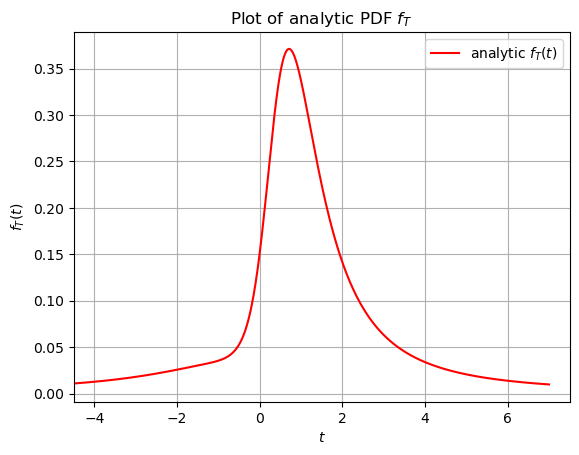

In [51]:
# plot of fT
plt.figure()
plt.plot(t_values, fT_values, 'r', linewidth=1.5)
plt.xlim([xMin[0], xMax[0]])  # plot in 3 sigma range
plt.xlabel('$t$')
plt.ylabel('$f_T(t)$')
plt.title('Plot of analytic PDF $f_T$')
plt.grid(True)
plt.legend(['analytic $f_T(t)$']);

## Plots from numerical inversions

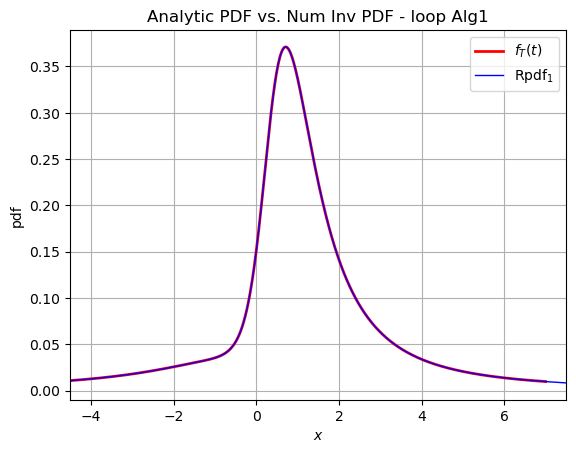

In [52]:
# RPDF1 vs Analytic
plt.figure()
plt.plot(t_values, fT_values, 'r', linewidth=2)
plt.plot(x1, Rpdfn_1n, 'b', linewidth=1)
plt.xlim([xMin[0], xMax[0]])  # plot in sigma range
plt.grid(True)
plt.title('Analytic PDF vs. Num Inv PDF - loop Alg1')
plt.xlabel('$x$')
plt.ylabel('pdf')
plt.legend(['$f_T(t)$', 'Rpdf$_1$']);

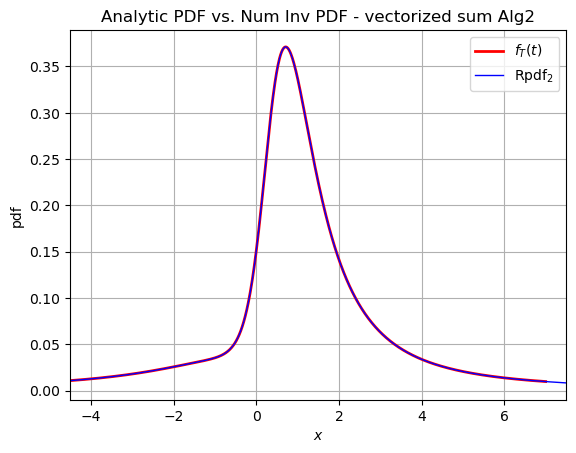

In [53]:
# RPDF2 vs Analytic
plt.figure()
plt.plot(t_values, fT_values, 'r', linewidth=2)
plt.plot(x1, Rpdfn_2n, 'b', linewidth=1)
plt.xlim([xMin[0], xMax[0]])  # plot in sigma range
plt.grid(True)
plt.title('Analytic PDF vs. Num Inv PDF - vectorized sum Alg2')
plt.xlabel('$x$')
plt.ylabel('pdf')
plt.legend(['$f_T(t)$', 'Rpdf$_2$']);

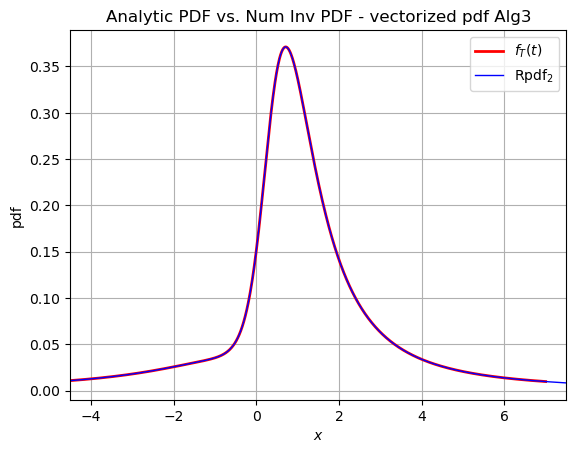

In [54]:
# RPDF2 vs Analytic
plt.figure()
plt.plot(t_values, fT_values, 'r', linewidth=2)
plt.plot(x1, Rpdf_3An, 'b', linewidth=1)
plt.xlim([xMin[0], xMax[0]]) # plot in  sigma range
plt.grid(True)
plt.title('Analytic PDF vs. Num Inv PDF - vectorized pdf Alg3')
plt.xlabel('$x$')
plt.ylabel('pdf')
plt.legend(['$f_T(t)$', 'Rpdf$_2$']);

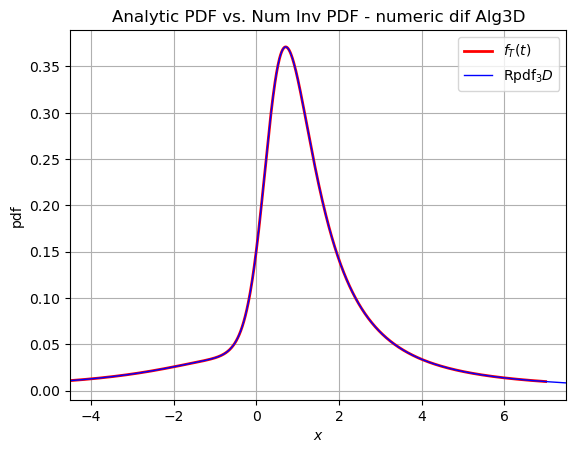

In [55]:
# RPDF3D vs Analytic
plt.figure()
plt.plot(t_values, fT_values, 'r', linewidth=2)
plt.plot(x1, Rpdf_3Dn, 'b', linewidth=1)
plt.xlim([xMin[0], xMax[0]]) # plot in  sigma range
plt.grid(True)
plt.title('Analytic PDF vs. Num Inv PDF - numeric dif Alg3D')
plt.xlabel('$x$')
plt.ylabel('pdf')
plt.legend(['$f_T(t)$', 'Rpdf$_3D$']);

# SAVING results

In [56]:
# setting folder for a xlsx file
folderPath = 'd:/Dropbox/00 Jupyter/00 Matematika/Probastat/data/MathematicaMATLAB/'

# Get the current date and time in a suitable format (e.g., YYYY-MM-DD-HH-MM-SS)
from datetime import datetime
currentDateTime = datetime.now().strftime('%Y_%m-%d-%H_%M_%S')

# Create the filename with N and date-time
fileName = f'Python-perfStats-N{xN}-{currentDateTime}.xlsx'
drt.to_excel(fileName)